# Importing Libraries

In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing Dataset
Dataset: https://www.kaggle.com/datasets/dhrubangtalukdar/ride-allocation-dataset/data

In [24]:
data = pd.read_csv('../data/raw/rideshare_dataset.csv', index_col='time_step')

## About the dataset
SmartRide is a simulated ride-sharing dispatch dataset created for reinforcement learning research. It models how a ride-sharing platform assigns drivers to incoming ride requests in a dynamic urban environment.

The environment is represented as a 2D city grid with multiple drivers whose locations change over time. Ride requests arrive stochastically, and demand varies depending on the time of day. The dataset also incorporates surge pricing and random cancellations to reflect realistic marketplace conditions.

Each row in the dataset corresponds to a single dispatch decision. It captures the full system state at that moment, including driver locations, the ride request location, time of day, demand–supply ratio, and driver ride history (used to measure fairness).

The recorded action indicates which driver was assigned to the request. The dataset also includes the observed reward, surge multiplier, and cancellation probability for that decision.

The reward is calculated as 

`Reward = Revenue − Waiting cost − Cancellation penalty − Fairness penalty`. <br>

In [25]:
data.head()

,hour,request_x,request_y,assigned_driver,wait_time,surge_multiplier,cancel_probability,cancelled,revenue,fairness_penalty,reward
time_step,,,,,,,,,,,
0,6,9.507404,11.265511,39,1.952673,1.000000,0.097634,False,50.000000,0.0,46.094654
1,14,15.111023,4.575963,9,2.151527,1.042394,0.107576,True,52.119715,0.0,-30.000000
2,18,3.224426,18.593953,5,0.188175,1.550145,0.009409,False,77.507242,0.0,77.130891
3,11,3.731401,17.851180,5,0.899297,1.115819,0.044965,False,55.790933,0.1,53.892338
4,22,17.921826,6.360069,34,1.397886,1.000000,0.069894,False,50.000000,0.0,47.204229


# Data Cleaning and Transformation

In [26]:
data.describe()

,hour,request_x,request_y,assigned_driver,wait_time,surge_multiplier,cancel_probability,revenue,fairness_penalty,reward
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,11.719000,9.760321,9.978392,24.200000,1.304354,1.207461,0.065218,60.373057,0.965200,51.485218
std,6.834966,5.628723,5.764352,14.246929,0.614762,0.241856,0.030738,12.092804,0.668608,23.874660
min,0.000000,0.003731,0.000614,0.000000,0.047310,1.000000,0.002366,50.000000,0.000000,-30.000000
25%,6.000000,5.055416,5.289080,12.000000,0.861336,1.000000,0.043067,50.000000,0.400000,46.664231
50%,12.000000,9.547173,10.138895,24.000000,1.237777,1.064386,0.061889,53.219281,0.900000,49.201276
75%,18.000000,14.425731,14.784919,37.000000,1.705955,1.500000,0.085298,75.000000,1.400000,70.976679
max,23.000000,19.988275,19.989325,49.000000,4.952260,1.775072,0.247613,88.753615,2.800000,86.362159


In [27]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hour                1000 non-null   int64  
 1   request_x           1000 non-null   float64
 2   request_y           1000 non-null   float64
 3   assigned_driver     1000 non-null   int64  
 4   wait_time           1000 non-null   float64
 5   surge_multiplier    1000 non-null   float64
 6   cancel_probability  1000 non-null   float64
 7   cancelled           1000 non-null   bool   
 8   revenue             1000 non-null   float64
 9   fairness_penalty    1000 non-null   float64
 10  reward              1000 non-null   float64
dtypes: bool(1), float64(8), int64(2)
memory usage: 79.2 KB


In [28]:
data.isnull().sum()

hour                  0
request_x             0
request_y             0
assigned_driver       0
wait_time             0
surge_multiplier      0
cancel_probability    0
cancelled             0
revenue               0
fairness_penalty      0
reward                0
dtype: int64

It is observed that the data does not have any missing value. Hence the process of handling the missing value is not needed.

In [29]:
# Since the majority of the data consist of float type (8 columns) other 2 coloumns with integer data type is converted into float.
data['hour'] = data['hour'].astype(float)

data['assigned_driver'] = data['assigned_driver'].astype(float)

data['cancelled'] = data['cancelled'].astype(float)

In [30]:
data.head()

,hour,request_x,request_y,assigned_driver,wait_time,surge_multiplier,cancel_probability,cancelled,revenue,fairness_penalty,reward
time_step,,,,,,,,,,,
0,6.0,9.507404,11.265511,39.0,1.952673,1.000000,0.097634,0.0,50.000000,0.0,46.094654
1,14.0,15.111023,4.575963,9.0,2.151527,1.042394,0.107576,1.0,52.119715,0.0,-30.000000
2,18.0,3.224426,18.593953,5.0,0.188175,1.550145,0.009409,0.0,77.507242,0.0,77.130891
3,11.0,3.731401,17.851180,5.0,0.899297,1.115819,0.044965,0.0,55.790933,0.1,53.892338
4,22.0,17.921826,6.360069,34.0,1.397886,1.000000,0.069894,0.0,50.000000,0.0,47.204229


# Data Visualization

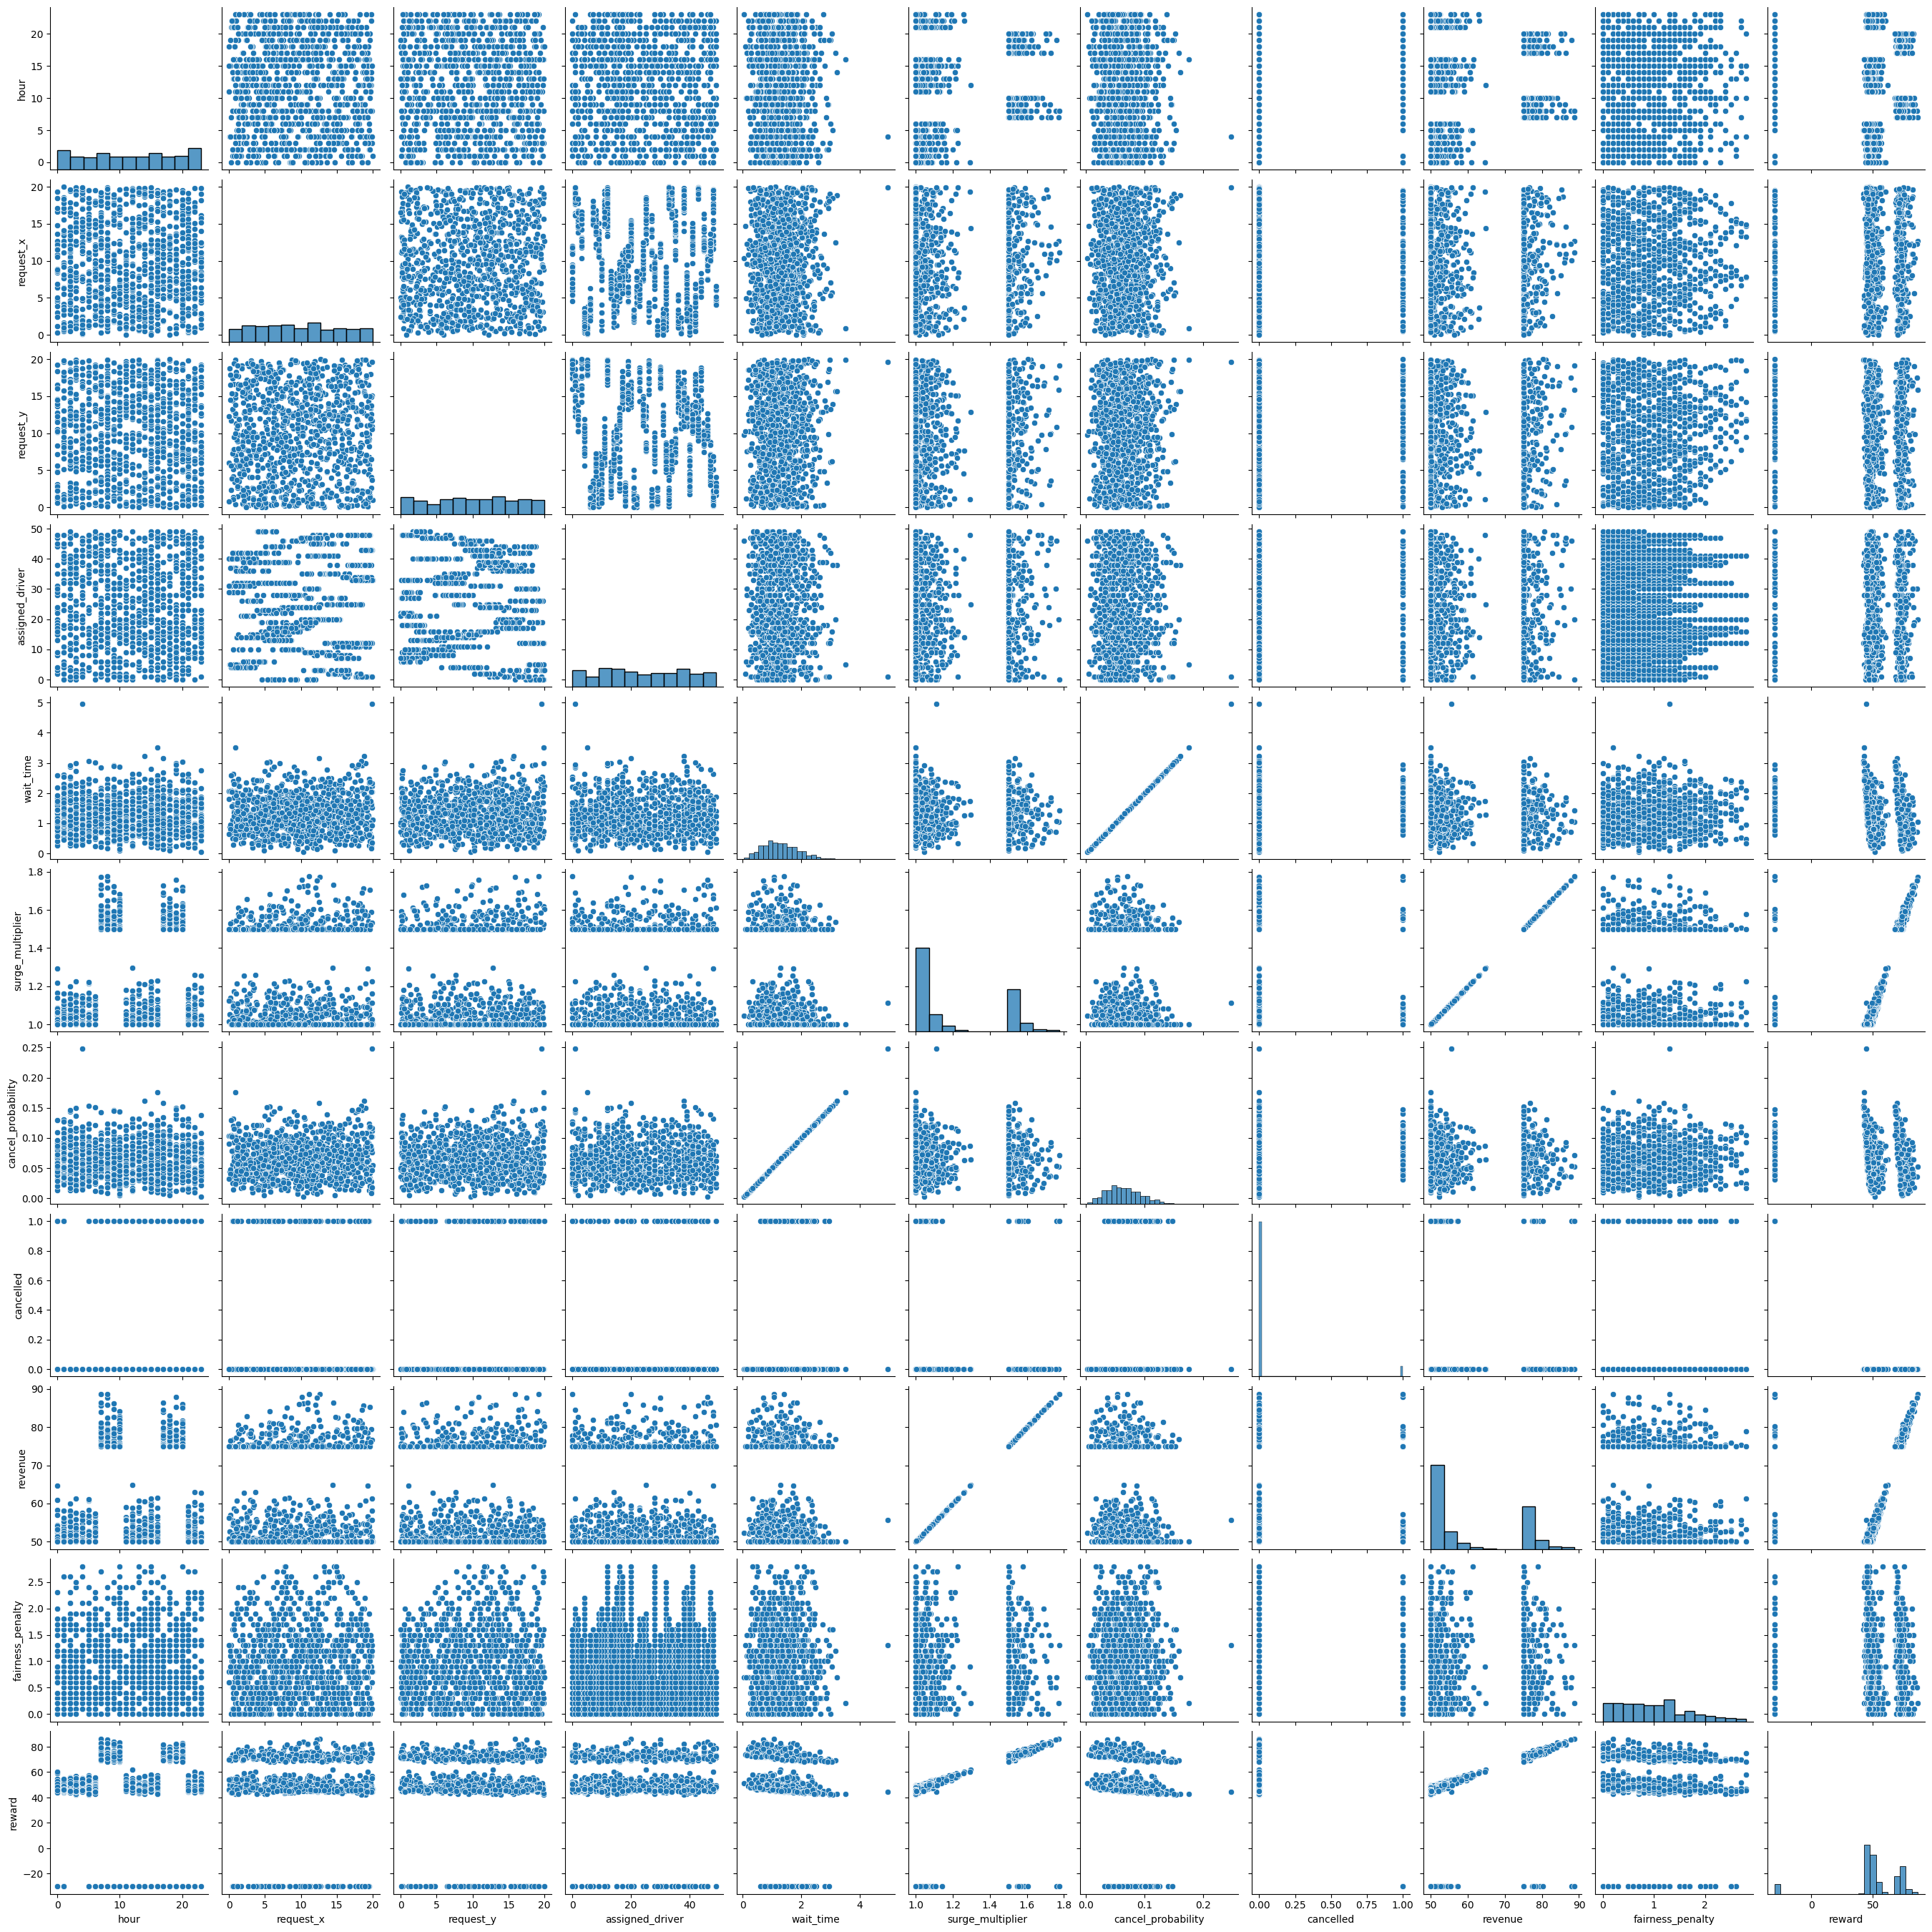

In [31]:
sns.pairplot(data)

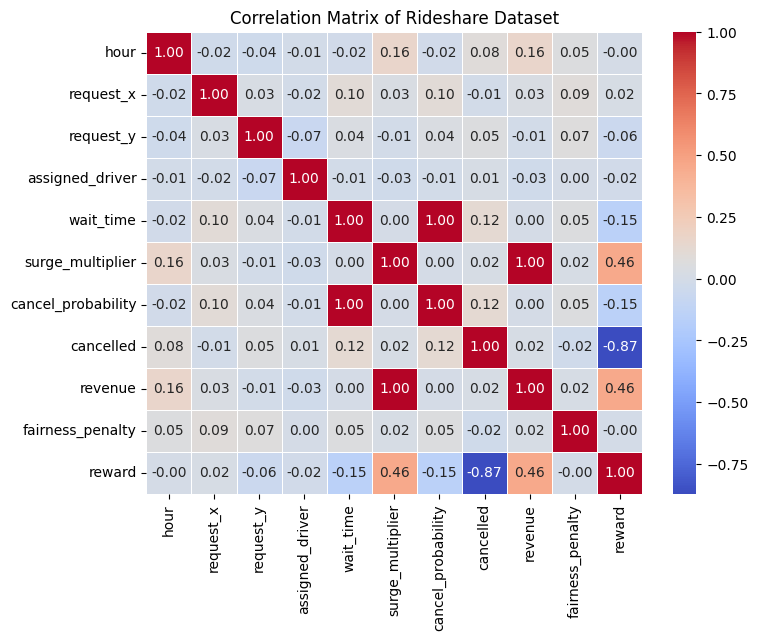

In [33]:
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True,        
            cmap='coolwarm',   
            fmt=".2f",         
            linewidths=.5)     


plt.title("Correlation Matrix of Rideshare Dataset")
plt.show()

The heatmap shows that reward is mainly driven by cancellations, revenue, and surge pricing.
* The strongest relationship is a strong negative correlation between cancelled rides and reward (−0.87) — cancellations greatly reduce reward.
* Revenue and surge multiplier have moderate positive correlations with reward (~0.46), meaning higher pricing increases reward.
* Wait time has a small negative effect on reward.
* Fairness penalty, location variables, and assigned driver show very weak correlations.

Overall, cancellations and pricing factors matter most, while other variables have limited linear impact on reward.

In [34]:
data.head()

,hour,request_x,request_y,assigned_driver,wait_time,surge_multiplier,cancel_probability,cancelled,revenue,fairness_penalty,reward
time_step,,,,,,,,,,,
0,6.0,9.507404,11.265511,39.0,1.952673,1.000000,0.097634,0.0,50.000000,0.0,46.094654
1,14.0,15.111023,4.575963,9.0,2.151527,1.042394,0.107576,1.0,52.119715,0.0,-30.000000
2,18.0,3.224426,18.593953,5.0,0.188175,1.550145,0.009409,0.0,77.507242,0.0,77.130891
3,11.0,3.731401,17.851180,5.0,0.899297,1.115819,0.044965,0.0,55.790933,0.1,53.892338
4,22.0,17.921826,6.360069,34.0,1.397886,1.000000,0.069894,0.0,50.000000,0.0,47.204229


In [36]:
data.to_csv('../data/processed/cleaned_dataset.csv', encoding='utf-8')